# 1. IMPORT DES LIBRAIRIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# 2. CHARGEMENT DES DONNÉES

In [3]:
df = pd.read_csv(r"marketing_data_raw.csv")  

print(f"{df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

2240 lignes, 29 colonnes


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage': missing_percent
})
print(missing_df[missing_df['Valeurs manquantes'] > 0])

        Valeurs manquantes  Pourcentage
Income                  24     1.071429


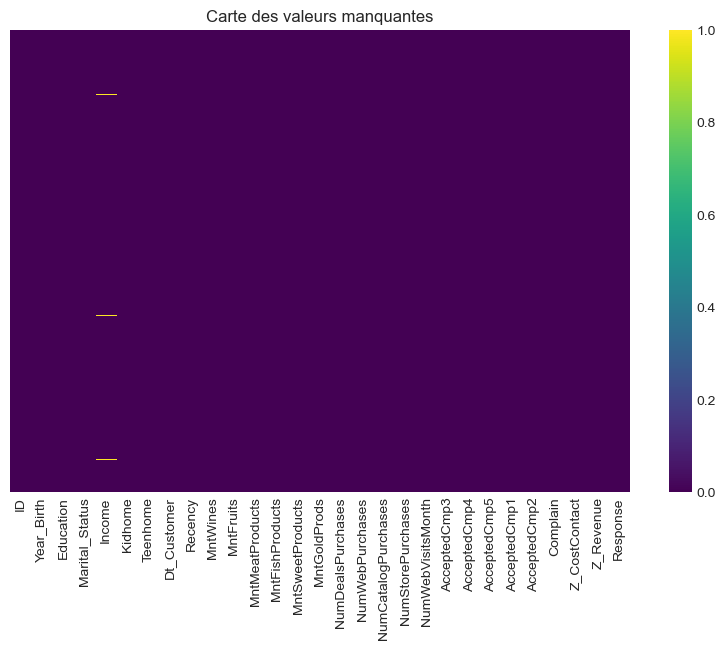

In [6]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 3. ANALYSE UNIVARIÉE

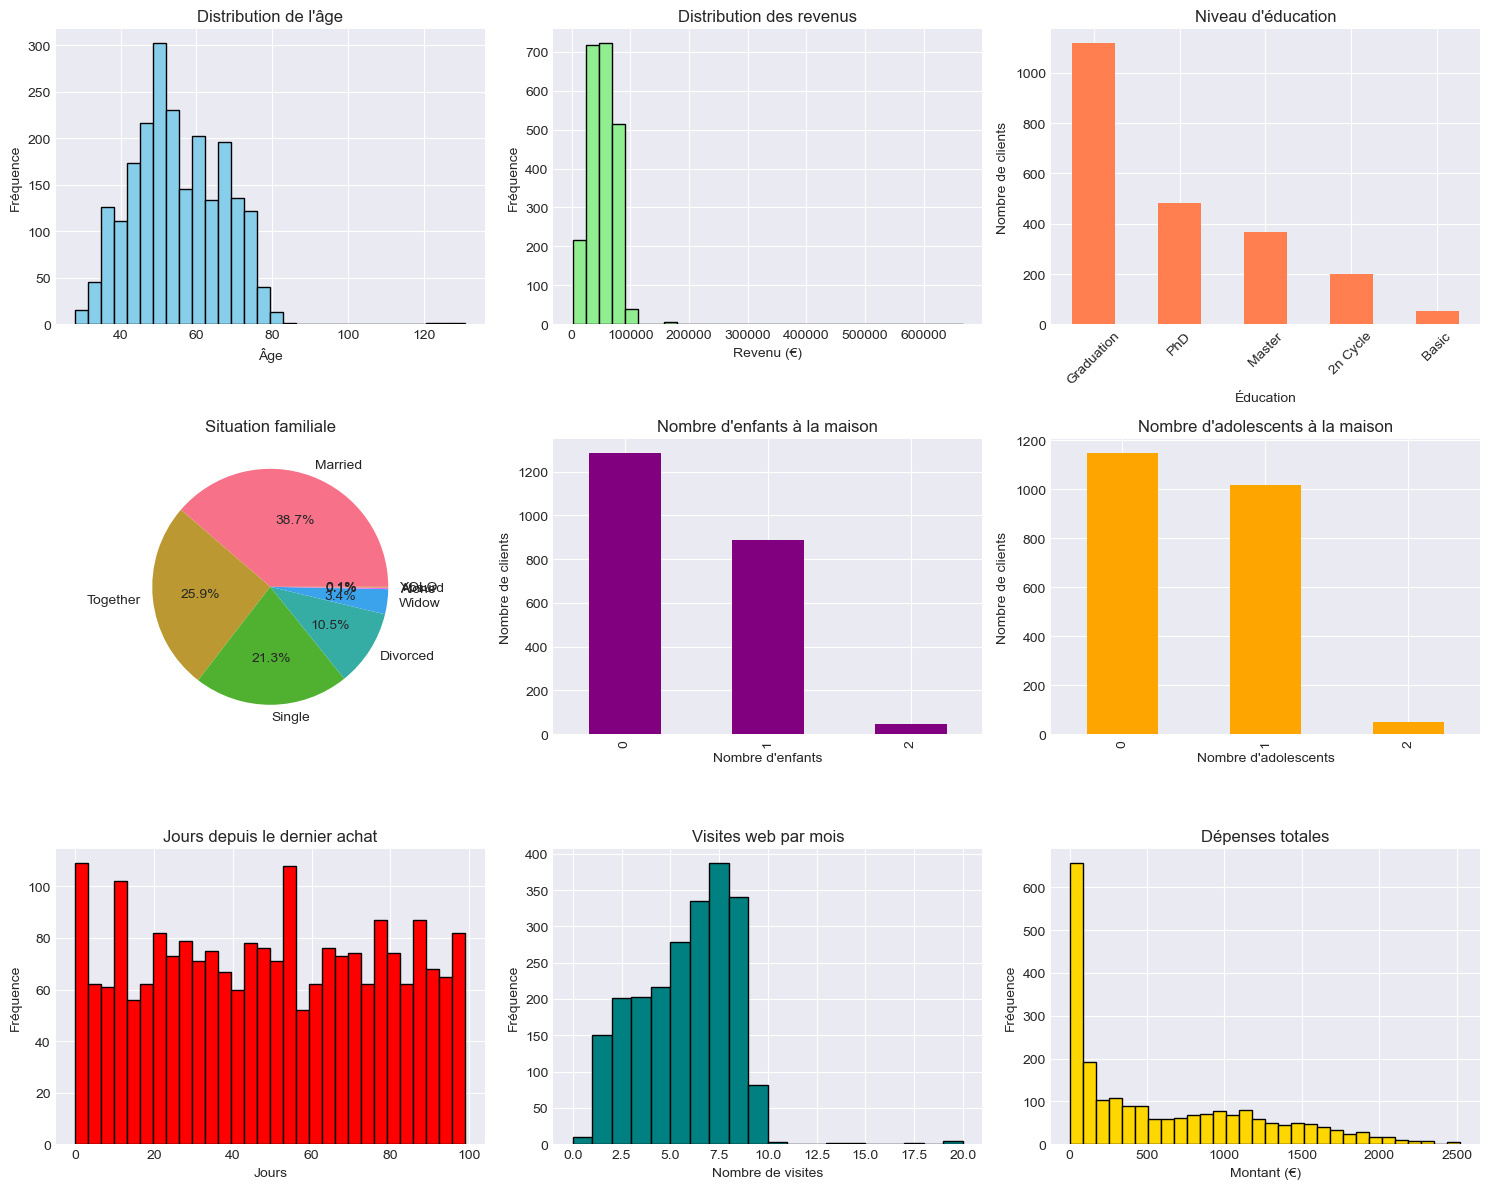

In [9]:
# Configuration des graphiques
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Distribution de l'âge (à créer à partir de Year_Birth)
df['Age'] = 2024 - df['Year_Birth']
axes[0, 0].hist(df['Age'], bins=30, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution de l\'âge')
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Fréquence')

# Distribution des revenus
axes[0, 1].hist(df['Income'].dropna(), bins=30, edgecolor='black', color='lightgreen')
axes[0, 1].set_title('Distribution des revenus')
axes[0, 1].set_xlabel('Revenu (€)')
axes[0, 1].set_ylabel('Fréquence')

# Niveau d'éducation
df['Education'].value_counts().plot(kind='bar', ax=axes[0, 2], color='coral')
axes[0, 2].set_title('Niveau d\'éducation')
axes[0, 2].set_xlabel('Éducation')
axes[0, 2].set_ylabel('Nombre de clients')
axes[0, 2].tick_params(axis='x', rotation=45)

# Situation familiale
df['Marital_Status'].value_counts().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%')
axes[1, 0].set_title('Situation familiale')
axes[1, 0].set_ylabel('')

# Nombre d'enfants à la maison
df['Kidhome'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Nombre d\'enfants à la maison')
axes[1, 1].set_xlabel('Nombre d\'enfants')
axes[1, 1].set_ylabel('Nombre de clients')

# Nombre d'adolescents
df['Teenhome'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 2], color='orange')
axes[1, 2].set_title('Nombre d\'adolescents à la maison')
axes[1, 2].set_xlabel('Nombre d\'adolescents')
axes[1, 2].set_ylabel('Nombre de clients')

# Récence des achats
axes[2, 0].hist(df['Recency'], bins=30, edgecolor='black', color='red')
axes[2, 0].set_title('Jours depuis le dernier achat')
axes[2, 0].set_xlabel('Jours')
axes[2, 0].set_ylabel('Fréquence')

# Nombre de visites web par mois
axes[2, 1].hist(df['NumWebVisitsMonth'], bins=20, edgecolor='black', color='teal')
axes[2, 1].set_title('Visites web par mois')
axes[2, 1].set_xlabel('Nombre de visites')
axes[2, 1].set_ylabel('Fréquence')

# Dépenses totales (à créer)
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
axes[2, 2].hist(df['Total_Spent'], bins=30, edgecolor='black', color='gold')
axes[2, 2].set_title('Dépenses totales')
axes[2, 2].set_xlabel('Montant (€)')
axes[2, 2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()



# 4. ANALYSE DES DÉPENSES PAR CATÉGORIE


ANALYSE DES DÉPENSES PAR CATÉGORIE


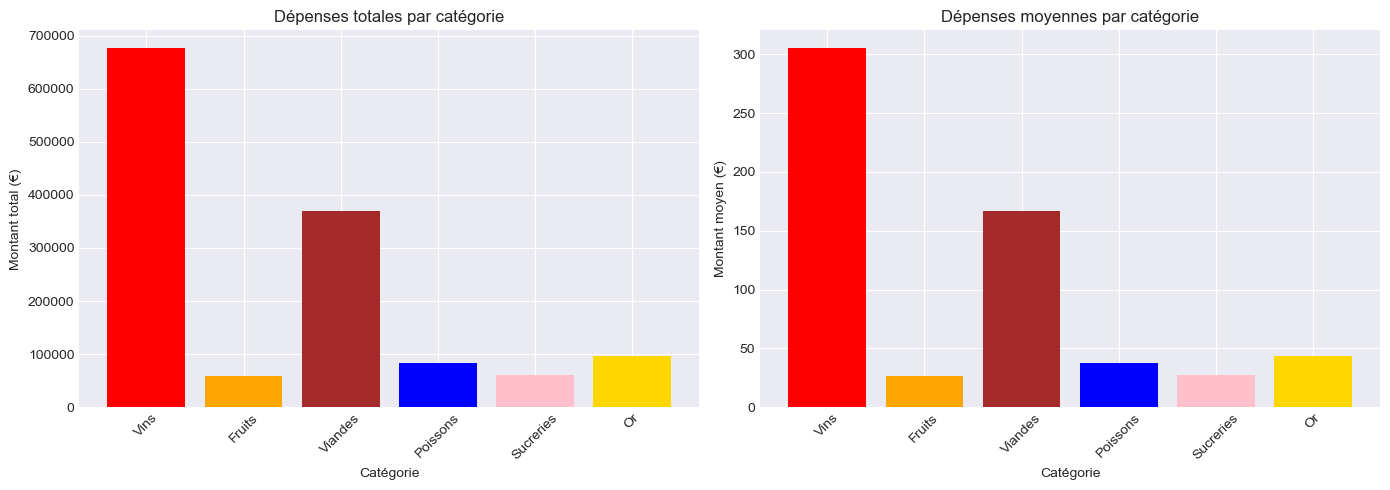


📊 Statistiques des dépenses par catégorie:
  • Vins: Total = 676,083€, Moyenne = 305.09€
  • Fruits: Total = 58,405€, Moyenne = 26.36€
  • Viandes: Total = 370,063€, Moyenne = 167.00€
  • Poissons: Total = 83,405€, Moyenne = 37.64€
  • Sucreries: Total = 59,896€, Moyenne = 27.03€
  • Or: Total = 97,427€, Moyenne = 43.97€


In [ ]:
# Préparer les données
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_names = ['Vins', 'Fruits', 'Viandes', 'Poissons', 'Sucreries', 'Or']

product_totals = df[product_cols].sum()
product_means = df[product_cols].mean()

# Graphique des totaux
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(product_names, product_totals.values, color=['red', 'orange', 'brown', 'blue', 'pink', 'gold'])
ax1.set_title('Dépenses totales par catégorie')
ax1.set_xlabel('Catégorie')
ax1.set_ylabel('Montant total (€)')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(product_names, product_means.values, color=['red', 'orange', 'brown', 'blue', 'pink', 'gold'])
ax2.set_title('Dépenses moyennes par catégorie')
ax2.set_xlabel('Catégorie')
ax2.set_ylabel('Montant moyen (€)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 Statistiques des dépenses par catégorie:")
for i, col in enumerate(product_cols):
    print(f"  • {product_names[i]}: Total = {product_totals[col]:,.0f}€, Moyenne = {product_means[col]:.2f}€")



# 5. ANALYSE DES CANAUX D'ACHAT

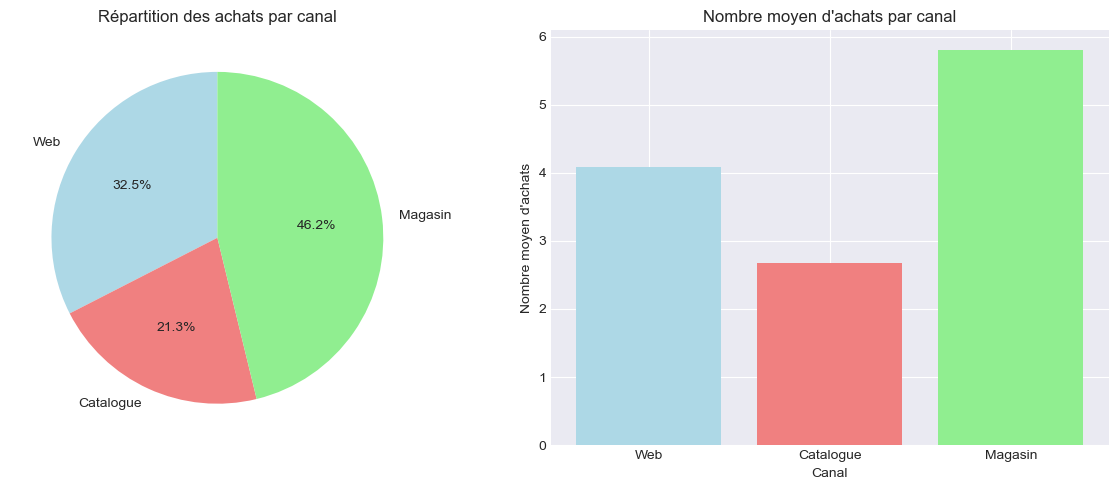


📊 Statistiques des canaux d'achat:
  • Web: Total = 9,053 achats, Moyenne = 4.09
  • Catalogue: Total = 5,919 achats, Moyenne = 2.67
  • Magasin: Total = 12,855 achats, Moyenne = 5.80


In [13]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_names = ['Web', 'Catalogue', 'Magasin']

channel_totals = df[channel_cols].sum()
channel_means = df[channel_cols].mean()

# Graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(channel_totals, labels=channel_names, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'lightgreen'], startangle=90)
ax1.set_title('Répartition des achats par canal')

ax2.bar(channel_names, channel_means.values, color=['lightblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Nombre moyen d\'achats par canal')
ax2.set_xlabel('Canal')
ax2.set_ylabel('Nombre moyen d\'achats')

plt.tight_layout()
plt.show()

print("\n📊 Statistiques des canaux d'achat:")
for i, col in enumerate(channel_cols):
    print(f"  • {channel_names[i]}: Total = {channel_totals[col]:,.0f} achats, Moyenne = {channel_means[col]:.2f}")


# 6. ANALYSE BIVARIÉE - RELATIONS ENTRE VARIABLES

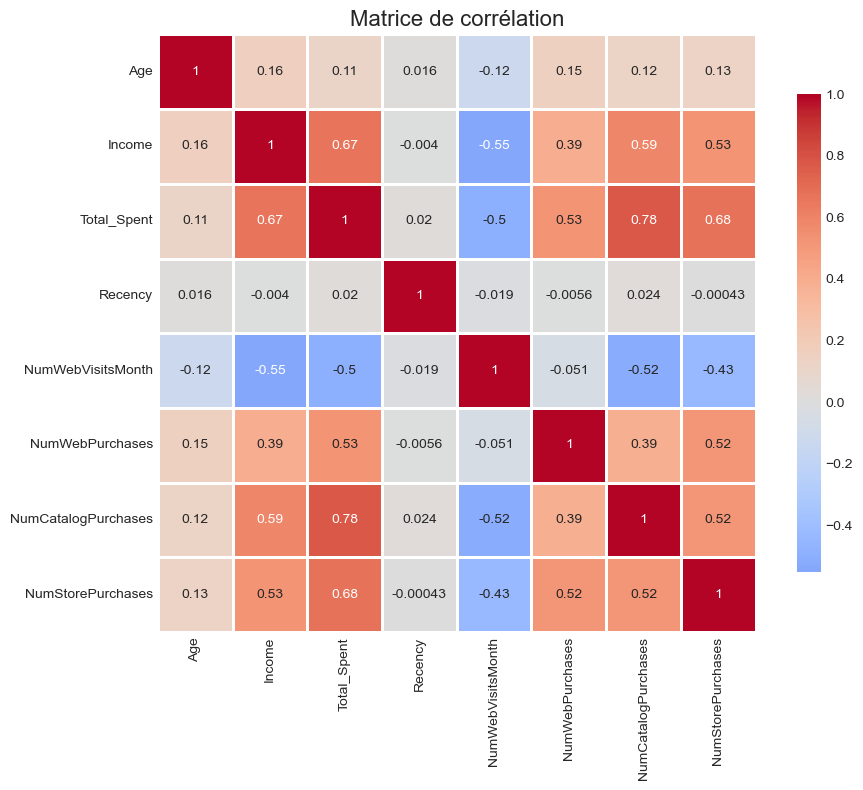

In [14]:
# Sélection des variables numériques
numeric_cols = ['Age', 'Income', 'Total_Spent', 'Recency', 'NumWebVisitsMonth',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Matrice de corrélation
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation', fontsize=16)
plt.tight_layout()
plt.show()


# 7. RELATIONS CLÉS

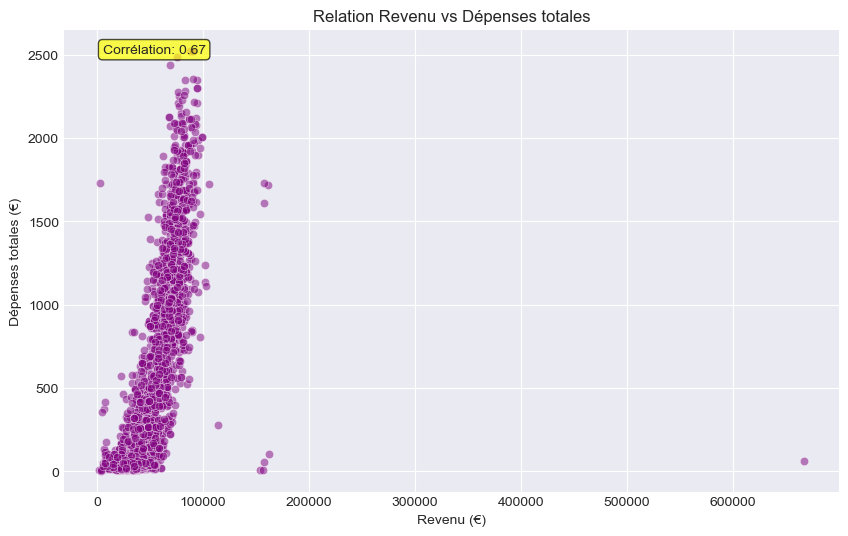

In [15]:
# Revenu vs Dépenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spent', alpha=0.5, color='purple')
plt.title('Relation Revenu vs Dépenses totales')
plt.xlabel('Revenu (€)')
plt.ylabel('Dépenses totales (€)')
corr = df['Income'].corr(df['Total_Spent'])
plt.text(0.05, 0.95, f'Corrélation: {corr:.2f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
plt.show()

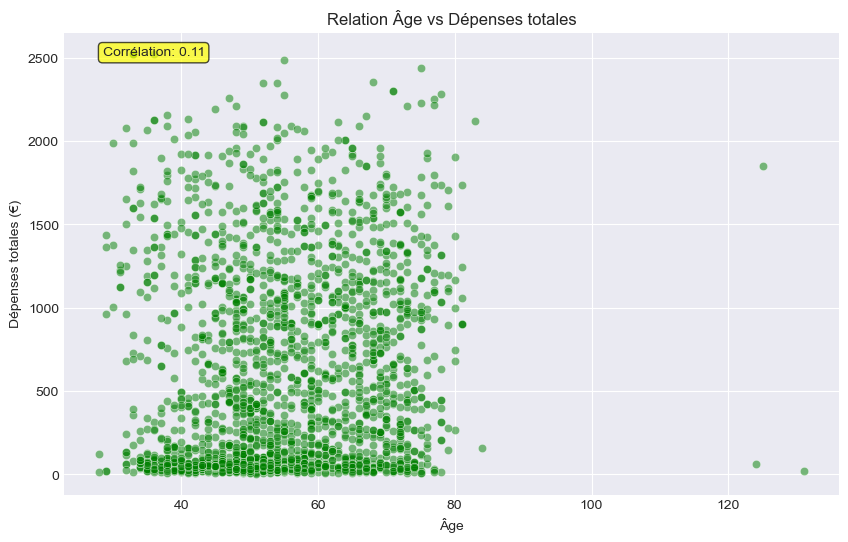

In [16]:
# Âge vs Dépenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Total_Spent', alpha=0.5, color='green')
plt.title('Relation Âge vs Dépenses totales')
plt.xlabel('Âge')
plt.ylabel('Dépenses totales (€)')
corr = df['Age'].corr(df['Total_Spent'])
plt.text(0.05, 0.95, f'Corrélation: {corr:.2f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
plt.show()

# 8. SYNTHÈSE DE L'EXPLORATION

In [ ]:
print("""
📌 POINTS CLÉS RETENUS:
------------------------""")

print(f"\n• {df.shape[0]} clients dans la base")
print(f"• {df.isnull().sum().sum()} valeurs manquantes au total")
print(f"• Revenu moyen: {df['Income'].mean():.0f}€")
print(f"• Âge moyen: {df['Age'].mean():.1f} ans")
print(f"• Dépense moyenne: {df['Total_Spent'].mean():.0f}€")

# Canal préféré
preferred_channel = channel_names[np.argmax(channel_means)]
print(f"• Canal préféré: {preferred_channel}")

# Produit préféré
preferred_product = product_names[np.argmax(product_means)]
print(f"• Produit préféré: {preferred_product}")

print("\n✅ Exploration terminée - Prêt pour le clustering")




📌 POINTS CLÉS RETENUS:
------------------------

• 2216 clients dans la base
• 0 valeurs manquantes au total
• Revenu moyen: 52247€
• Âge moyen: 55.2 ans
• Dépense moyenne: 607€
• Canal préféré: Magasin
• Produit préféré: Vins

✅ Exploration terminée - Prêt pour le clustering

💾 Données nettoyées sauvegardées dans 'data_cleaned.csv'


In [18]:
# Sauvegarde des données nettoyées
df.to_csv('data_cleaned.csv', index=False)
print("\n💾 Données nettoyées sauvegardées dans 'data_cleaned.csv'")


💾 Données nettoyées sauvegardées dans 'data_cleaned.csv'
